# E is for Exploratory Data Analysis (Numeric Data)
> What is Exploratory Data Analysis (EDA), why is it done, and how do we do it in Python?

- toc: false 
- badges: True
- comments: true
- categories: [draft]
- sticky_rank: 4
- hide: True

## _What is **Exploratory Data Analysis(EDA)**?_
EDA is the process of getting to know our data primarily through simple visualizations before fitting a model. As Wickham and Grolemund state, EDA is more an attitude than a scripted list of steps which must be carried out{% fn 1 %}.  
## _Why is it done?_
Two main reasons: 

1. If we collected the data ourselves to solve a problem, we need to determine whether our data is sufficient for solving that problem.  

2. If we didn't collect the data ourselves, we need to have a basic understanding of the type, quantity, quality, and possible relationships between the features in our data.

## _How do we do it in Python?_

While I could use a toy data set, like in my [last post](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/algorithm/2020/05/26/d-is-for-decision-tree.html) but after seeing comments like this 

> twitter: https://twitter.com/drob/status/1021233822392881152


I'm feeling inspired to use my own data :grin:

As always, I'll follow the steps outlined in [_Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow_](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md)

### Step 1: Frame the Problem
"Given a set of features, can we determine how old someone needs to be to read a book?" 

### Step 2: Get the Data
To answer the question above, I sourced labeled data by scraping [Common Sense Media's Book Reviews](https://www.commonsensemedia.org/book-reviews) using `BeautifulSoup` and then wrote the data to a csv.{% fn 2 %} 

![](../images/e-is-for-eda/csm2.png "Credit: https://www.commonsensemedia.org/book-reviews")  


### Step 3: Explore the Data to Gain Insights (i.e. EDA)
As always, import the essential libraries, then load the data. 

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/educatorsRlearners/book-maturity/master/csv/book_info_complete.csv'

df = pd.read_csv(url)

Time to start asking and answering some basic questions: 

- How much data do we have? 

In [2]:
df.shape

(5816, 24)

OK, so we have 23 features and one target as well as 5,816 observations.

*Why do we have fewer than in the screenshot above?*

Because Common Sense Media is constantly adding new reviews to their website, meaning they've added nearly 100 books to their site since I completed my project at the end of March 2020. 

- What type of data do we have? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           5816 non-null   object 
 1   description                     5816 non-null   object 
 2   plot                            5816 non-null   object 
 3   csm_review                      5816 non-null   object 
 4   need_to_know                    5816 non-null   object 
 5   par_rating                      2495 non-null   float64
 6   kids_rating                     3026 non-null   float64
 7   csm_rating                      5816 non-null   int64  
 8   Author                          5468 non-null   object 
 9   Genre                           5816 non-null   object 
 10  Topics                          3868 non-null   object 
 11  Book type                       5816 non-null   object 
 12  Publisher                       56

Looks like a mix of strings and floats. 

Lets take a closer look. 

In [4]:
df.head().T

,0,1,2,3,4
title,The Third Twin,Small Damages,"The School for Good and Evil, Book 1","Agent of Chaos: The X-Files Origins, Book 1",Crossing Ebenezer Creek
description,Gripping thriller skimps on character developm...,Luminous story of pregnant teen's summer in Sp...,Fractured fairy tale has plenty of twists for ...,"Series pictures Mulder as teen, captures essen...",Heartbreaking novel follows freed slaves on Sh...
plot,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","It's the summer of 1996, which 18-year-old Ken...",When best friends Sophie and Agatha are stolen...,"Set in 1979, AGENT OF CHAOS follows a 17-year-...",CROSSING EBENEZER CREEK is a YA novel from awa...
csm_review,"THE THIRD TWIN has an interesting, compelling ...",This could well have been a minefield of clich...,The School for Good and Evil is no run-of-the-...,Popular TV characters don't always make a smoo...,"Beautifully written and poetically rendered, t..."
need_to_know,Parents need to know that The Third Twin is a ...,Parents need to know that Small Damages is nar...,Parents need to know that The School for Good ...,Parents need to know that Agent of Chaos: The ...,Parents need to know that Crossing Ebenezer Cr...
par_rating,17,NaN,11,NaN,NaN
kids_rating,14,14,11,NaN,NaN
csm_rating,12,14,8,13,13
Author,CJ Omololu,Beth Kephart,Soman Chainani,Kami Garcia,Tonya Bolden
Genre,Mystery,Coming of Age,Fairy Tale,Science Fiction,Historical Fiction


The picture is becoming clearer. Again, since I collected the data, I know that the target is `csm_rating` which is the minimum age Common Sense Media (CSM) says a reader should be for the given book.

Also, we have essentially three types of features:
- Numeric
    - `par_rating` : Ratings of the book by parents
    - `kids_rating` : Ratings of the book by children  
    - :dart:`csm_rating` : Ratings of the books by Common Sense Media
    - `Number of pages` : Length of the book 
    - `Publisher's recommended age(s)`: Self explanatory
    

- Date
    - `Publication date` : When the book was published
    - `Last updated`: When the book's information was updated 

with all other features being text. 

To make inspecting a little easier, lets clean those column names. {% fn 3 %}

In [5]:
df.columns

Index(['title', 'description', 'plot', 'csm_review', 'need_to_know',
       'par_rating', 'kids_rating', 'csm_rating', 'Author', 'Genre', 'Topics',
       'Book type', 'Publisher', 'Publication date',
       'Publisher's recommended age(s)', 'Number of pages', 'Available on',
       'Last updated', 'Illustrator', 'Authors', 'Awards', 'Publishers',
       'Award', 'Illustrators'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [7]:
df.columns

Index(['title', 'description', 'plot', 'csm_review', 'need_to_know',
       'par_rating', 'kids_rating', 'csm_rating', 'author', 'genre', 'topics',
       'book_type', 'publisher', 'publication_date',
       'publisher's_recommended_ages', 'number_of_pages', 'available_on',
       'last_updated', 'illustrator', 'authors', 'awards', 'publishers',
       'award', 'illustrators'],
      dtype='object')

Much better. 

Given the number and variety of features, I'm just going to focus on the numeric features in this post and analyze the text features in a part II. 

Therefore, lets subset the data frame work with only the features of interest.

In [8]:
numeric = ['par_rating', 'kids_rating', 'csm_rating', 'number_of_pages', "publisher's_recommended_ages"]

In [9]:
df_numeric = df[numeric]

In [10]:
df_numeric.head()

,par_rating,kids_rating,csm_rating,number_of_pages,publisher's_recommended_ages
0,17.0,14.0,12,336.0,12 - 18
1,NaN,14.0,14,304.0,14 - 17
2,11.0,11.0,8,496.0,8 - 17
3,NaN,NaN,13,320.0,14 - 18
4,NaN,NaN,13,240.0,NaN


:thumbsdown: `publisher's_recommended_ages` is a range instead of a minimum.  
:thumbsup: We can fix that. 

Given that we only care about the minimum age, we can: 
- split the string on the hyphen
- keep only the first value since that will be the lowest

In [11]:
df_numeric['pub_rating'] = df.loc[:, "publisher\'s_recommended_ages"].str.split("-", n=1, expand=True)[0] 

#Set the column as numeric
df_numeric.loc[:, 'pub_rating'] = pd.to_numeric(df_numeric['pub_rating'])

/home/evan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/evan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
df_numeric.head()

,par_rating,kids_rating,csm_rating,number_of_pages,publisher's_recommended_ages,pub_rating
0,17.0,14.0,12,336.0,12 - 18,12.0
1,NaN,14.0,14,304.0,14 - 17,14.0
2,11.0,11.0,8,496.0,8 - 17,8.0
3,NaN,NaN,13,320.0,14 - 18,14.0
4,NaN,NaN,13,240.0,NaN,NaN


Now we can drop the unnecessary column. 

In [13]:
df_numeric = df_numeric.drop(columns="publisher's_recommended_ages")
df_numeric.head()

,par_rating,kids_rating,csm_rating,number_of_pages,pub_rating
0,17.0,14.0,12,336.0,12.0
1,NaN,14.0,14,304.0,14.0
2,11.0,11.0,8,496.0,8.0
3,NaN,NaN,13,320.0,14.0
4,NaN,NaN,13,240.0,NaN


In [14]:
df_numeric.loc[:, 'csm_rating'].describe()

count    5816.000000
mean        9.161623
std         3.881257
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        17.000000
Name: csm_rating, dtype: float64

Good news! We do not have any missing values for our target! Also, we can see the lowest recommended age for a book is 2 years old, which has to be a picture book, while the highest is 17.  

All useful info, but what does our target look like? 

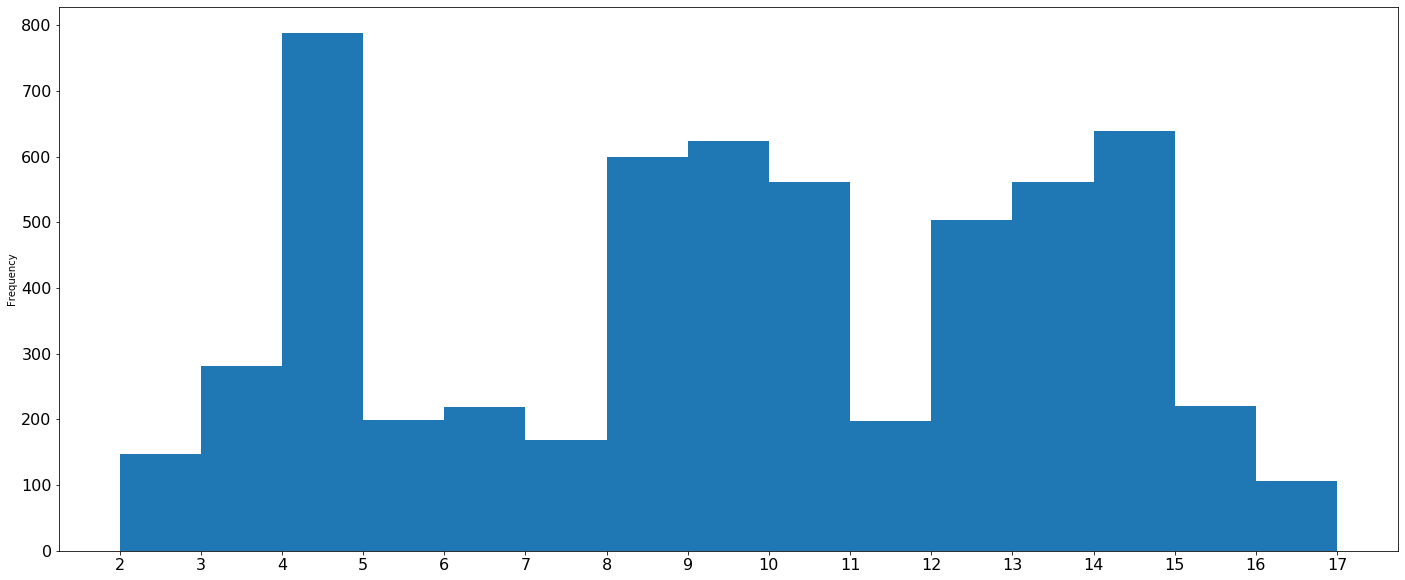

In [15]:
df_numeric.loc[:, 'csm_rating'].plot(kind= "hist", 
                             bins=range(2,18),
                             figsize=(24,10),
                             xticks=range(2,18),
                             fontsize=16);

Hmmm. Two thoughts: 

First, we clearly have skewed data so when we split the data into`train-test-validate` splits, we'll need to do a [stratified random sample](https://www.investopedia.com/terms/stratified_random_sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,as%20income%20or%20educational%20attainment.).

Second, the distribution is multimodal; there appears to be books which are targeted for really young readers, (e.g., 5 years old), tweens, and teens or older.   

Given this distribution, we could simplify our task from predicting an exact age and instead predict an age group. Something to keep in mind for future research.

Moving on. 

#### Missing Values
Looking back at the output from `df.info()`, its obvious that several features have missing values but let's visualize it to make it clear.

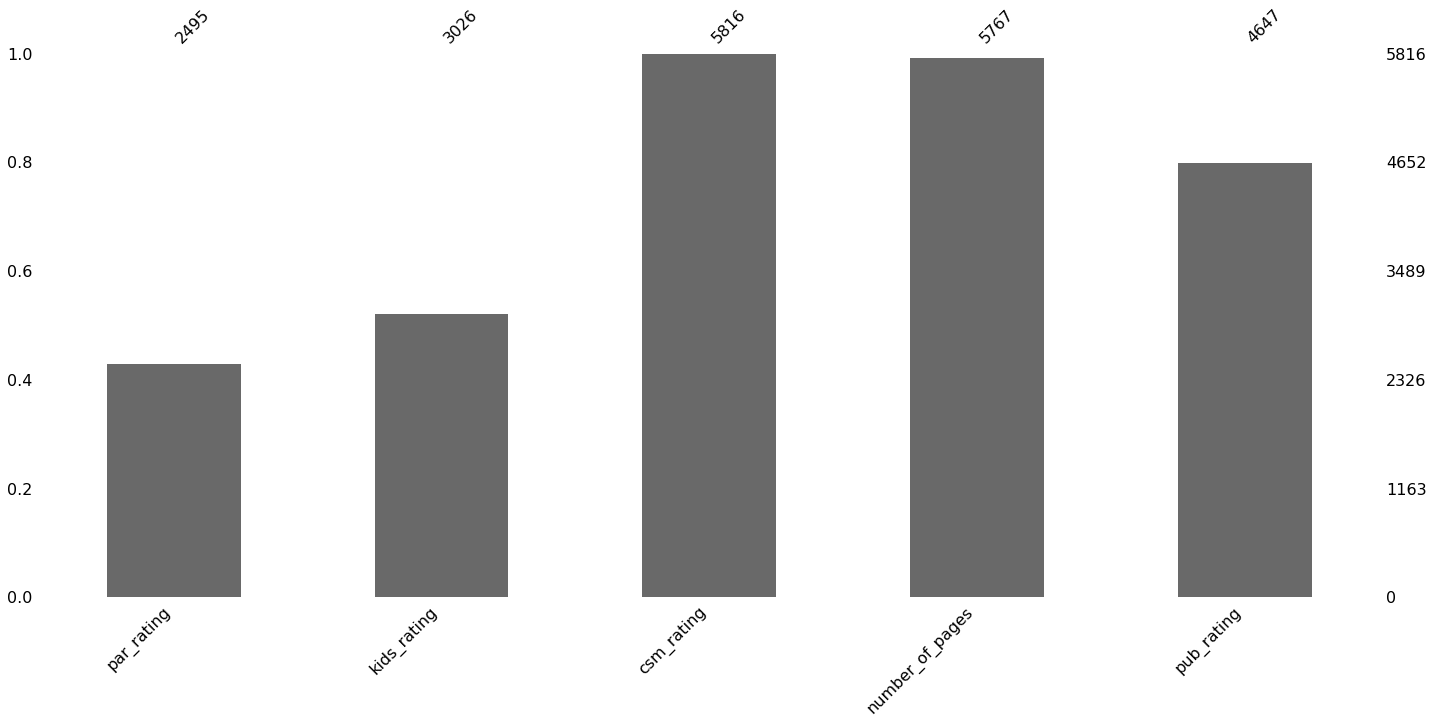

In [16]:
import missingno as msno 

msno.bar(df_numeric);

Good News!
- There aren't any missing values in target feature. 

Bad News!
- Nearly half of the `kids_rating` and more than half of the parent's ratings are missing. 

When we get to the cleaning/feature engineering stage, we'll have to decide whether it's better to drop or [impute](https://en.wikipedia.org/wiki/Imputation_(statistics)) the missing values, but, before we do that, lets see if their is a pattern to what's missing.

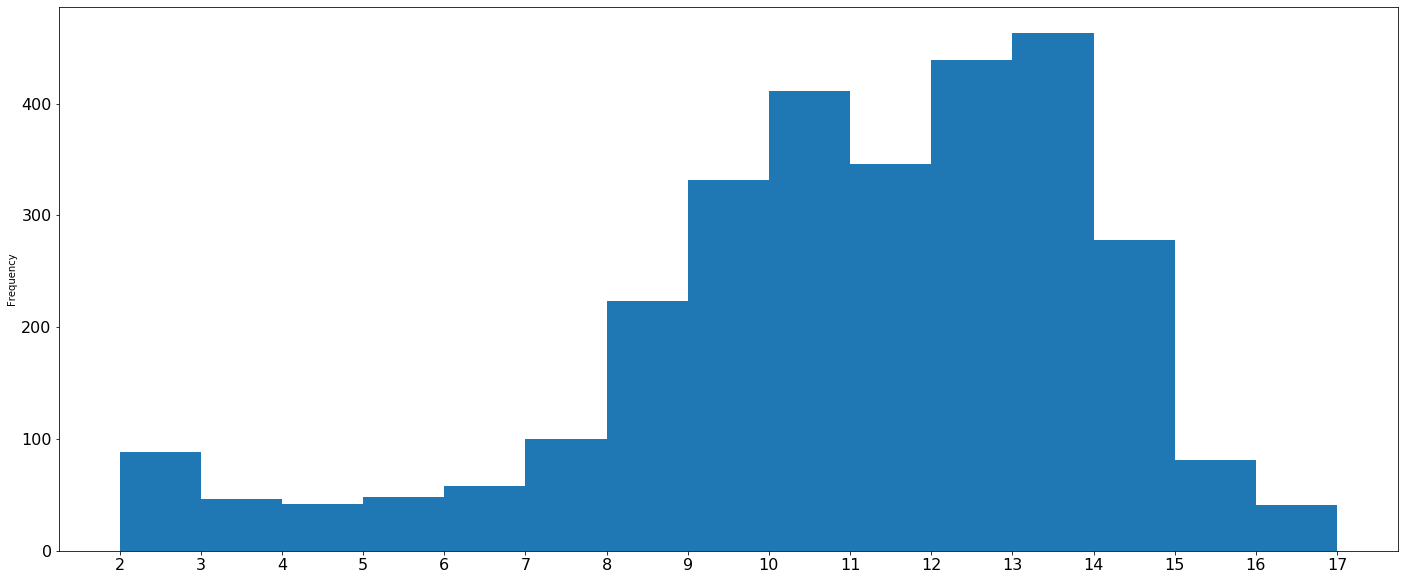

In [17]:
df_numeric['kids_rating'].plot(kind= "hist", 
                             bins=range(2,18),
                             figsize=(24,10),
                             xticks=range(2,18),
                             fontsize=16);

Hmmm. Looks like the children who left the bulk of the reviews think the books are suitable for children between the ages of 8 and 14. 

What about the parent's ratings? 

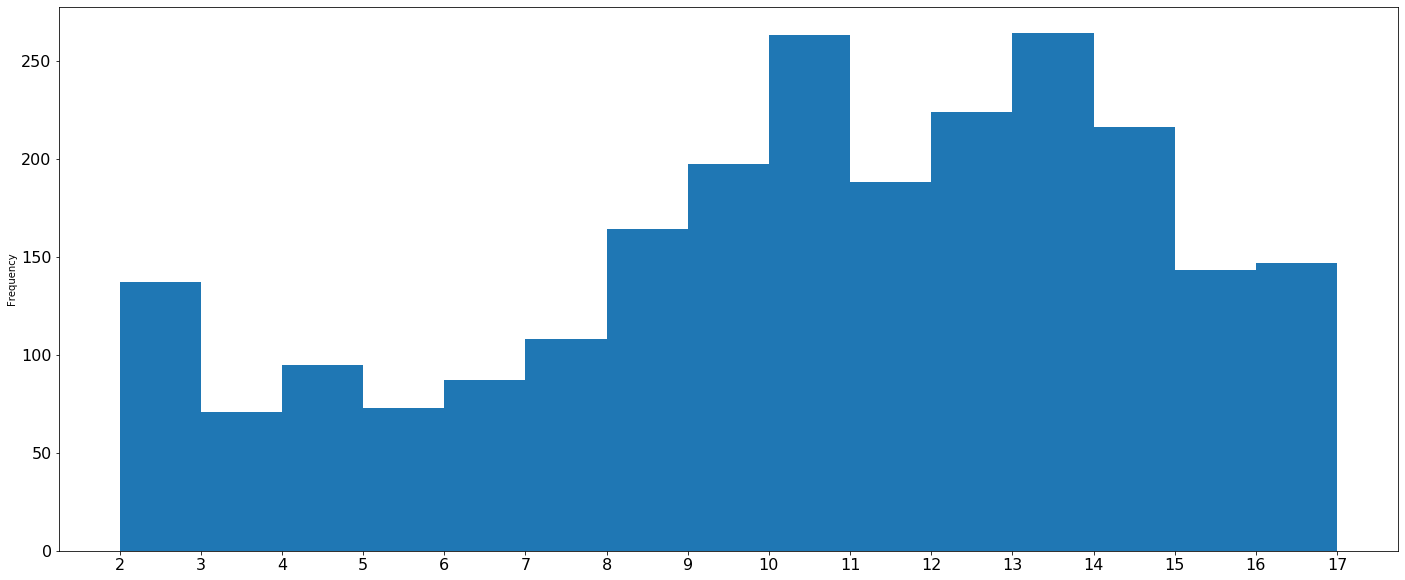

In [18]:
df_numeric['par_rating'].plot(kind= "hist", 
                             bins=range(2,18),
                             figsize=(24,10),
                             xticks=range(2,18),
                             fontsize=16);

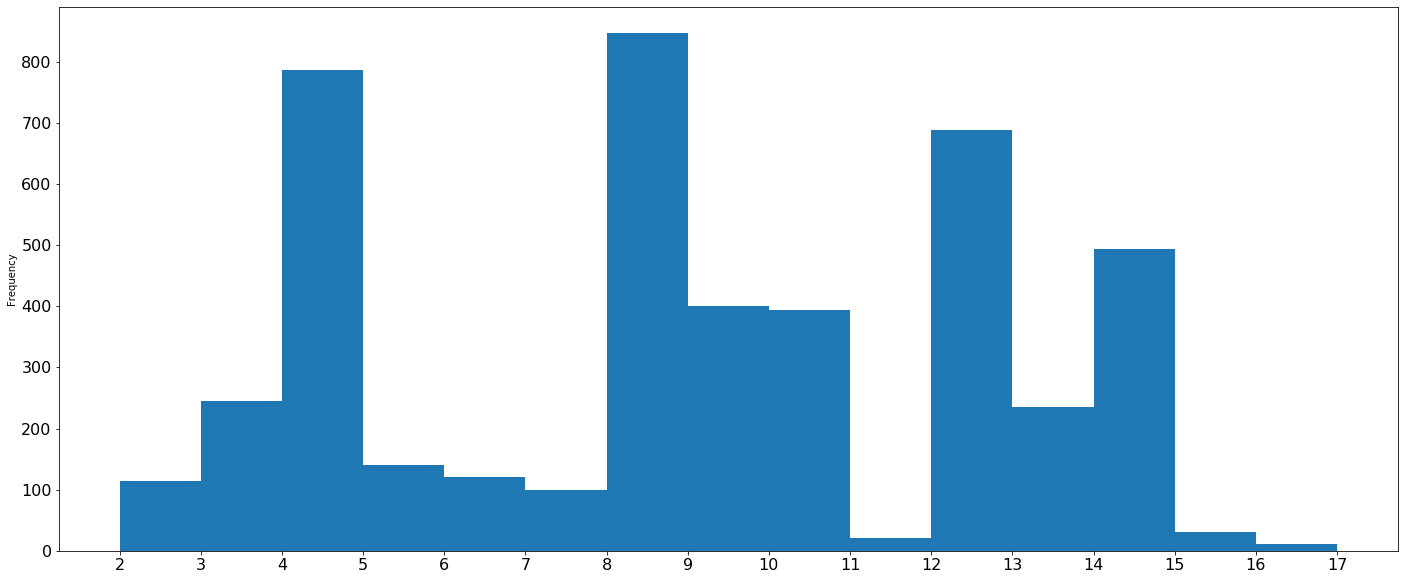

In [19]:
df_numeric['pub_rating'].plot(kind= "hist", 
                             bins=range(2,18),
                             figsize=(24,10),
                             xticks=range(2,18),
                             fontsize=16);

While more evenly distributed than the kid's ratings, it is still far more skewed than the target feature. 

Lets see how well all the three sets of ratings correlate with one another. 

In [20]:
df_numeric.corr()

,par_rating,kids_rating,csm_rating,number_of_pages,pub_rating
par_rating,1.000000,0.659812,0.693141,0.498847,0.658364
kids_rating,0.659812,1.000000,0.738464,0.477987,0.712893
csm_rating,0.693141,0.738464,1.000000,0.762447,0.959898
number_of_pages,0.498847,0.477987,0.762447,1.000000,0.762534
pub_rating,0.658364,0.712893,0.959898,0.762534,1.000000


In [21]:
ratings = df_numeric.loc[:, 'par_rating':'csm_rating']

ratings.corr()

,par_rating,kids_rating,csm_rating
par_rating,1.000000,0.659812,0.693141
kids_rating,0.659812,1.000000,0.738464
csm_rating,0.693141,0.738464,1.000000


:thinking: The parents and kids ratings correlate more strongly with the target than they do with each other. 

### Rating and Book Length

Quick question: is there a correlation between the length of the book and the target age of the reader? Let's find out. 

In [22]:
df_numeric['csm_rating'].corr(df_numeric['number_of_pages'])

0.7624465844200318

As expected, there is a strong correlation between the length of a book and the age of the target reader. 

Lets plot the relationship. 

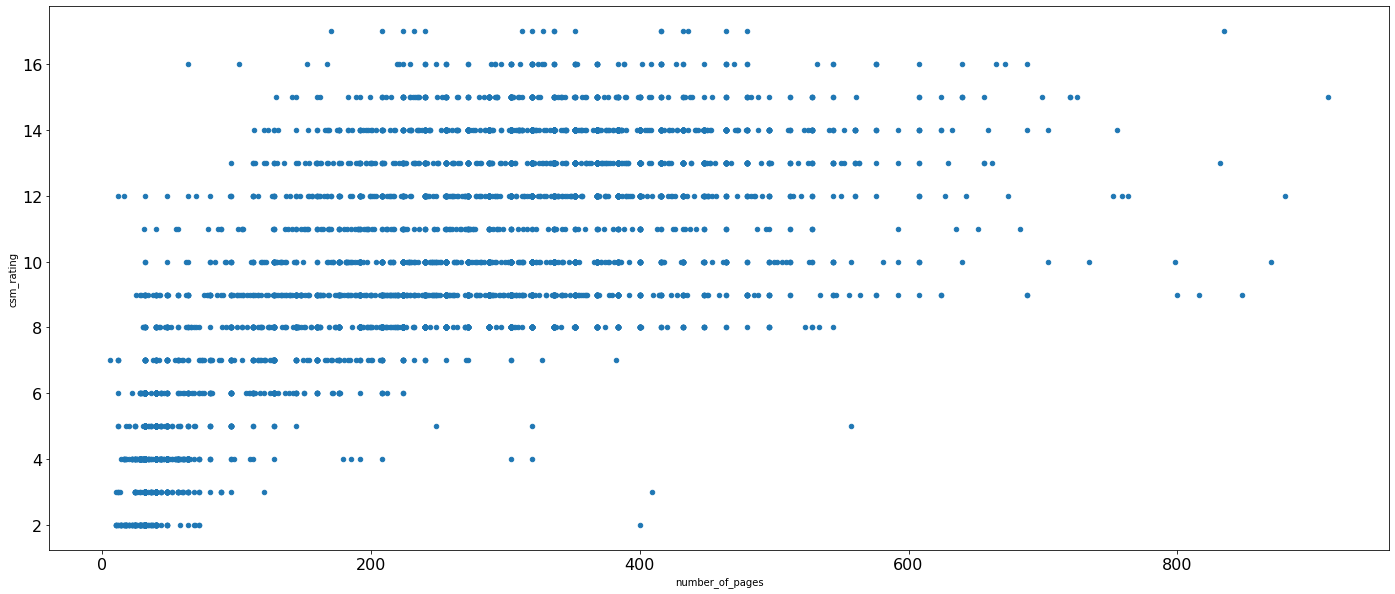

In [23]:
df_numeric.plot.scatter(x='number_of_pages', 
                        y="csm_rating",
                        figsize=(24,10),
                        fontsize=16);

We have spotted our first probable outliers: it is inconceivable for a ~400 page book to be meant for a two or three year old, right? 

In [24]:
df.query('csm_rating < 6 & number_of_pages > 300')[['title','description']]

,title,description
2516,Beatrix Potter: The Complete Tales,"All of Beatrix Potter in one book, pre-K and K."
3158,Splat the Cat,Even cats worry about the first day of school.
4076,Eloise: The Ultimate Edition,All four stories about the irrepressible Eloise.
4463,A Giant Crush,"Fun Valentine story stresses self-esteem, frie..."
4499,The Complete Tales & Poems of Winnie-the-Pooh,"Beloved, classic stories and poems in one volume."
4954,Mad About Madeline,The stories vary in quality but still delight.


Well so much for that idea :grin: 

To quote the [AI Guru](https://ai-guru.de/), instead of simply relying on print outs of and plots, you "should always look at your *bleeping* data." 

## Summary



### Further Reading


### Footnotes
{{ '[Chapter 7: Exploratory Data Analysis in *R for Data Science* by Hadley Wickham  & Garrett Grolemund](https://r4ds.had.co.nz/exploratory-data-analysis.html)' | fndetail: 1 }}  
{{ 'You can find the code [here](https://github.com/educatorsRlearners/book-maturity/blob/master/00_get_search_pages.ipynb)' | fndetail: 2 }}  
{{ 'Big *Thank You* to [Chaim Gluck](https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd) for providing this tip' | fndetail: 3 }}